In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout, Flatten
from keras.optimizers import Adam
from keras.layers import Dense
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import MaxPooling2D , Conv2D
import cv2
from sklearn.model_selection import train_test_split
import os
import random
from keras.preprocessing.image import ImageDataGenerator


In [2]:
path = "D:\Logos1"
labelFile = "D:\Labels1.csv" 
batch_size_val=5 
steps_per_epoch_val=5
epochs_val=10
imageDimesions = (400,400,3)
testRatio = 0.2   
validationRatio = 0.2


In [3]:
count = 0
classNo = []
images = []

myList = os.listdir(path)
print("Total existing Classes Detected in Dataset:",len(myList))
noOfClasses=len(myList)
print("Importing the Classes ...")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
classNo = np.array(classNo)
images = np.array(images)

Total existing Classes Detected in Dataset: 11
Importing the Classes ...
0 1 2 3 4 5 6 7 8 9 10  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [5]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

assert(X_train.shape[0]==y_train.shape[0]), "The No of images are not equal to No of lables in training dataset"
assert(X_validation.shape[0]==y_validation.shape[0]), "The No of images are not equal to the No of lables in validation dataset"
assert(X_test.shape[0]==y_test.shape[0]), "The No of images are not equal to the No of lables in test dataset"
assert(X_train.shape[1:]==(imageDimesions))," The dimesions of Training images are not matching "
assert(X_validation.shape[1:]==(imageDimesions))," The dimesions of Validation images are not matching "
assert(X_test.shape[1:]==(imageDimesions))," The dimesions of Test images are not matching"

Data Shapes
Train(29, 400, 400, 3) (29,)
Validation(8, 400, 400, 3) (8,)
Test(10, 400, 400, 3) (10,)


In [6]:
data=pd.read_csv(labelFile)
print("data shape : ",data.shape,type(data))

data shape :  (11, 2) <class 'pandas.core.frame.DataFrame'>


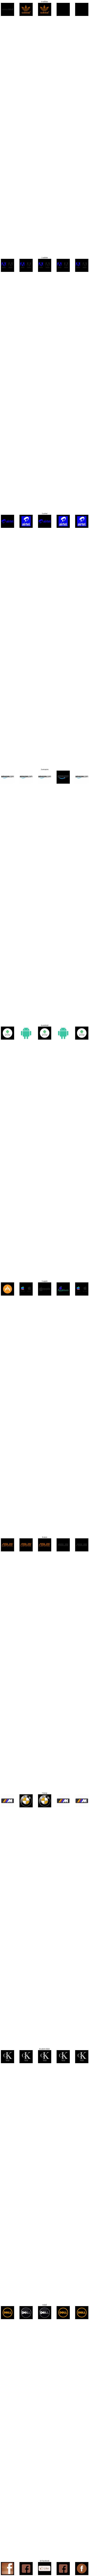

In [7]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(10, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected)- 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+ "-"+row["Name"])
            num_of_samples.append(len(x_selected))

[4, 1, 2, 2, 2, 4, 2, 3, 1, 2, 6]


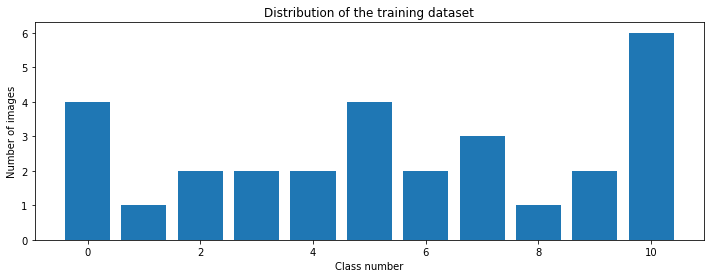

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [9]:
def grayscale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):
    img =cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255            
    return img
 
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))
cv2.imshow("GrayScale Images",X_train[random.randint(0,len(X_train)-1)]) 

In [10]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [11]:
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)  
X_batch,y_batch = next(batches)

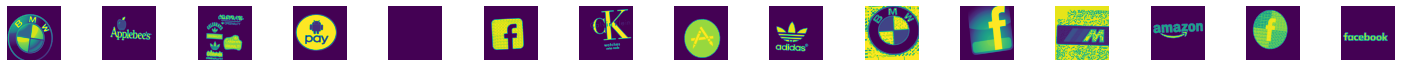

In [12]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimesions[0],imageDimesions[1]))
    axs[i].axis('off')
plt.show()
 
 
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

In [13]:
def myModel():
    no_Of_Filters=60
    size_of_Filter=(5,5) 
                         
    size_of_Filter2=(3,3)
    size_of_pool=(2,2)  
    no_Of_Nodes = 500  
    model= Sequential()
    model.add((Conv2D(no_Of_Filters,size_of_Filter,input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  
    model.add((Conv2D(no_Of_Filters, size_of_Filter, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool)) 
 
    model.add((Conv2D(no_Of_Filters//2, size_of_Filter2,activation='relu')))
    model.add((Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
 
    model.add(Flatten())
    model.add(Dense(no_Of_Nodes,activation='relu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(noOfClasses,activation='softmax')) 
    # COMPILE MODEL
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [14]:
model = myModel()
print(model.summary())
history=model.fit(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 396, 396, 60)      1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 392, 392, 60)      90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 196, 196, 60)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 194, 194, 30)      16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 192, 192, 30)      8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 96, 96, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 30)        0

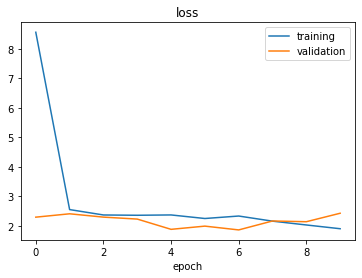

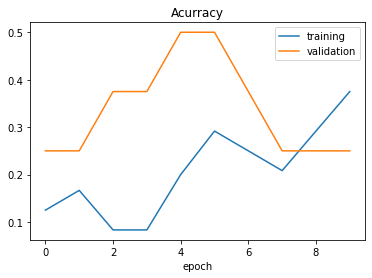

Test Score: 2.747170925140381
Test Accuracy: 0.0


In [16]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [17]:
# STORE THE MODEL AS A PICKLE OBJECT
#pickle_out= open("model_trained.p","wb")  # wb = WRITE BYTE
#pickle.dump(model,pickle_out)
#pickle_out.close()
#cv2.waitKey(0)

model.save('my_model.h5')
#model1=load_model('model.h5')